In [1]:
%load_ext autoreload
%autoreload 2
import terra
import numpy as np
from domino.data.gqa import split_gqa, read_gqa_dps,DATASET_DIR
from domino.slices.gqa import collect_rare_slices, TASKS, build_rare_slice
from domino.train import synthetic_score_slices
import seaborn as sns
import matplotlib.pyplot as plt

/home/sabri/code/meerkat/meerkat/nn/__init__.py:7: ExperimentalWarning: The `meerkat.nn` module is experimental and has limited test coverage. Proceed with caution.
  warnings.warn(


In [2]:
from domino.evaluate import evaluate_sdms, run_sdm, score_sdms
# evaluate_dp = evaluate_sdms.out(run_id=5729, load=True)
# df = score_sdms(evaluate_dp).load()

df = score_sdms.out(run_id=5802, load=True)
df = df.dropna()

In [3]:
df.iloc[df.reset_index().groupby(["slice", "target"])['auroc'].idxmax().astype(int)]

,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,target,slice,run_sdm_run_id
25,0,0.744127,0.111111,0.333333,0.141414,0.222222,0.311111,0.466667,person,babies,5735
90,0,0.931940,0.111111,0.083333,0.090909,0.108696,0.195652,0.456522,vehicle,bike,5748
100,0,0.830436,0.111111,0.041667,0.060606,0.105263,0.157895,0.315789,vehicle,boat,5750
50,0,0.999344,1.000000,0.833333,0.232323,0.913043,1.000000,1.000000,farm_animal,cat,5740
75,0,0.973606,0.555556,0.541667,0.242424,0.545455,0.727273,0.818182,farm_animal,chicken,5745
120,0,0.662010,0.111111,0.041667,0.050505,0.047619,0.119048,0.119048,clothing,coat,5754
60,0,0.819571,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,farm_animal,cow,5742
115,0,0.818286,0.222222,0.125000,0.080808,0.102564,0.205128,0.256410,clothing,dress,5753
32,2,0.799833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,person,drinkers,5736
37,2,0.826281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,person,drivers,5737


In [4]:
inp = run_sdm.inp(run_id=5740, load=True)
data_dp, emb_dp = inp["data_dp"], inp["emb_dp"]
data_dp = data_dp.lz[data_dp["split"].isin(["valid", "test"])].merge(
    emb_dp[["object_id", "emb"]], on="object_id"
)

In [78]:
from domino.sdm import MixtureModelSDM, SpotlightSDM
sdm = MixtureModelSDM(
    n_slices=8, weight_y_log_likelihood=7, init_params="error"
)

In [79]:
sdm.fit(data_dp.lz[data_dp["split"] == "valid"])

 30%|███       | 30/100 [00:00<00:01, 38.71it/s]


In [80]:
dp = sdm.transform(data_dp.lz[data_dp["split"] == "test"])

In [85]:
from domino.metrics import compute_sdm_metrics
compute_sdm_metrics(dp)

,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200
0,0,0.018213,0.0,0.000000,0.000000,0.0,0.0,0.0
1,1,0.007540,0.0,0.000000,0.000000,0.0,0.0,0.0
2,2,0.999926,0.0,0.958333,0.232323,1.0,1.0,1.0
3,3,0.683451,0.0,0.000000,0.000000,0.0,0.0,0.0
4,4,0.111815,0.0,0.000000,0.000000,0.0,0.0,0.0
5,5,0.001915,0.0,0.000000,0.000000,0.0,0.0,0.0
6,6,0.027721,0.0,0.000000,0.000000,0.0,0.0,0.0
7,7,0.690070,0.0,0.000000,0.000000,0.0,0.0,0.0


In [82]:
from domino.emb.clip import embed_words
from domino.explain import explain_slice
slice_idx= 2
words_dp = embed_words.out(5143).load()
expl_dp = explain_slice(slice_dp=dp, words_dp=words_dp.lz[:int(1e4)], slice_idx=slice_idx)
expl_dp.lz[(-expl_dp["score"]).argsort()[:10]]

,word (PandasSeriesColumn),score (NumpyArrayColumn),frequency (PandasSeriesColumn)
0,cat,7.121094,48970
1,sits,6.835938,32791
2,cats,6.175781,26014
3,alley,4.878906,15871
4,sox,4.699219,34420
5,lounge,4.570312,14912
6,wednesday,4.531250,29888
7,airing,4.277344,32783
8,prone,4.230469,15019
9,wicket,4.195312,15365


,object_image (LambdaColumn),target (PandasSeriesColumn),slice (PandasSeriesColumn)
0,,1,1
1,,1,1
2,,1,1
3,,1,0
4,,1,1
5,,1,1
6,,1,1
7,,1,1
8,,1,1
9,,1,1

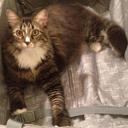
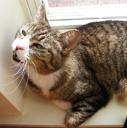
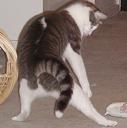
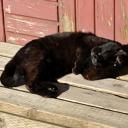
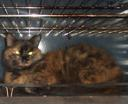
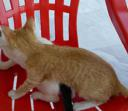
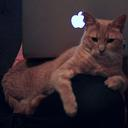
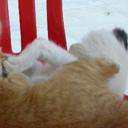
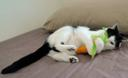
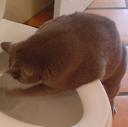

In [83]:
dp.lz[dp["slices"].data[:, slice_idx].argsort()[-10:]][["object_image", "target", "slice"]]

In [38]:
y = np.array([[1, 0, 0], [0, 1, 0]])
y_hat = np.array([[0.6, 0.3, 0.1], [0.5, 0.3, 0.2]])

In [39]:
a = np.matmul(y[:, :, np.newaxis], y_hat[:, np.newaxis, :]).reshape (len(y), -1)

In [47]:
np.concatenate([a] * (int(13 / 9) + (13 % 9 > 0)), axis=1)[:, :13].shape

(2, 13)